# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('who.csv')


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

In [4]:
# refered from notes
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 7,240
Columns: 58


In [5]:
df.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'newrel_m014',
       'newrel_m1524', 'newrel_m2534', 'newrel_m3544', 'newrel_m4554',
       'newrel_m5564', 'newrel_m65', 'newrel_f014', 'newrel_f1524',
       'newrel_f2534', 'newrel_f3544', 'newrel_f4554', 'newrel_f5564',
       'newrel_f65'],
   

In [6]:
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

### How many countries are present?

In [7]:
countries = len(pd.unique(df['country']))  
print("No. of countries :", countries)

No. of countries : 219


In [8]:
count = 0
visited = []
for i in range(0, len(df['country'])):
    if df['country'][i] not in visited:
        visited.append(df['country'][i])
        count += 1
print("No. of countries :", count)

No. of countries : 219


### What's the timespan of the data?

In [68]:
x = df['year'].min()
y = df['year'].max()
print(f'timespan of the data {x}, {y} : {y-x} years')

timespan of the data 1980, 2013 : 33 years


### Does each country have a row for every year present?

In [82]:
df.groupby('country')['year'].count()

country
Afghanistan                  34
Albania                      34
Algeria                      34
American Samoa               34
Andorra                      34
                             ..
Wallis and Futuna Islands    34
West Bank and Gaza Strip     34
Yemen                        34
Zambia                       34
Zimbabwe                     34
Name: year, Length: 219, dtype: int64

In [83]:
#referred through notes
a = df['country'].value_counts(dropna=False)
print('NO, not every countries has all years',a)

NO, not every countries has all years United Republic of Tanzania          34
Ireland                              34
Italy                                34
Greece                               34
India                                34
                                     ..
Serbia                                9
Sint Maarten (Dutch part)             4
Curacao                               4
Bonaire, Saint Eustatius and Saba     4
South Sudan                           3
Name: country, Length: 219, dtype: int64


### Which countries are missing years?

In [50]:
df[['country','year']].count()


country    7240
year       7240
dtype: int64

In [108]:
res = df[df['country'].map(a<34)]
output = pd.unique(res['country'])
print(f'countries having missing years : {output}')

countries having missing years : ['Bonaire, Saint Eustatius and Saba' 'Curacao' 'Montenegro'
 'Netherlands Antilles' 'Serbia' 'Serbia & Montenegro'
 'Sint Maarten (Dutch part)' 'South Sudan' 'Timor-Leste']


### How many rows have at least 1 non-null values across the columns 3-57?
### Here are the non-null values count of all rows for each columns.
###### https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/

In [67]:
drop_col = df.drop(columns=['country', 'year'])
drop_col.dropna(axis=0, thresh=1, inplace=True)
print(f'rows : {len(drop_col)}')

rows : 3484


#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [22]:
# Code
# refered through class notes
final_data = pd.melt(df, id_vars=['country','year'], value_vars=None,
                     var_name='diagnosis', value_name='number of cases', col_level=None)

In [23]:
diagnosis_method = {
    'new_sp' : 'Pulmonary Smear (+)' ,
    'new_sn' : 'Pulmonary Smear (-)' ,
    'new_ep' : 'Extrapulmonary' ,
    'newrel' : 'Relapse'
}
final_data['diagnosis method'] = (final_data['diagnosis'].apply(lambda x : x[:6])).map(diagnosis_method)

In [24]:
gender = {
    'm' : 'male',
    'f' : 'female'
}
final_data['gender'] = (final_data['diagnosis'].apply(lambda x : x[7])).map(gender)

In [25]:
age = {
    '014'  : '0-14',
    '1524' : '15-24',
    '2534' : '25-34',
    '3544' : '35-44',
    '4554' : '45-54',
    '5564' : '55-64',
    '65'   : '65+'
}
final_data['age'] = (final_data['diagnosis'].apply(lambda x : x[8:])).map(age)

In [29]:
final_data = final_data.drop(columns = ['diagnosis'])

In [30]:
final_data.head()

,country,year,number of cases,diagnosis method,gender,age
0,Afghanistan,1980,NaN,Pulmonary Smear (+),male,0-14
1,Afghanistan,1981,NaN,Pulmonary Smear (+),male,0-14
2,Afghanistan,1982,NaN,Pulmonary Smear (+),male,0-14
3,Afghanistan,1983,NaN,Pulmonary Smear (+),male,0-14
4,Afghanistan,1984,NaN,Pulmonary Smear (+),male,0-14


In [31]:
final_data.tail()

,country,year,number of cases,diagnosis method,gender,age
405435,Zimbabwe,2009,NaN,Relapse,female,65
405436,Zimbabwe,2010,NaN,Relapse,female,65
405437,Zimbabwe,2011,NaN,Relapse,female,65
405438,Zimbabwe,2012,NaN,Relapse,female,65
405439,Zimbabwe,2013,725.0,Relapse,female,65


#### Question 3: Create a graph that shows when countries started to report TB cases.
###### https://towardsdatascience.com/analysing-and-visualising-the-country-wise-population-from-1955-to-2020-with-pandas-matplotlib-70b3614eed6b

Text(0.5, 1.0, 'countries started to report tb cases')

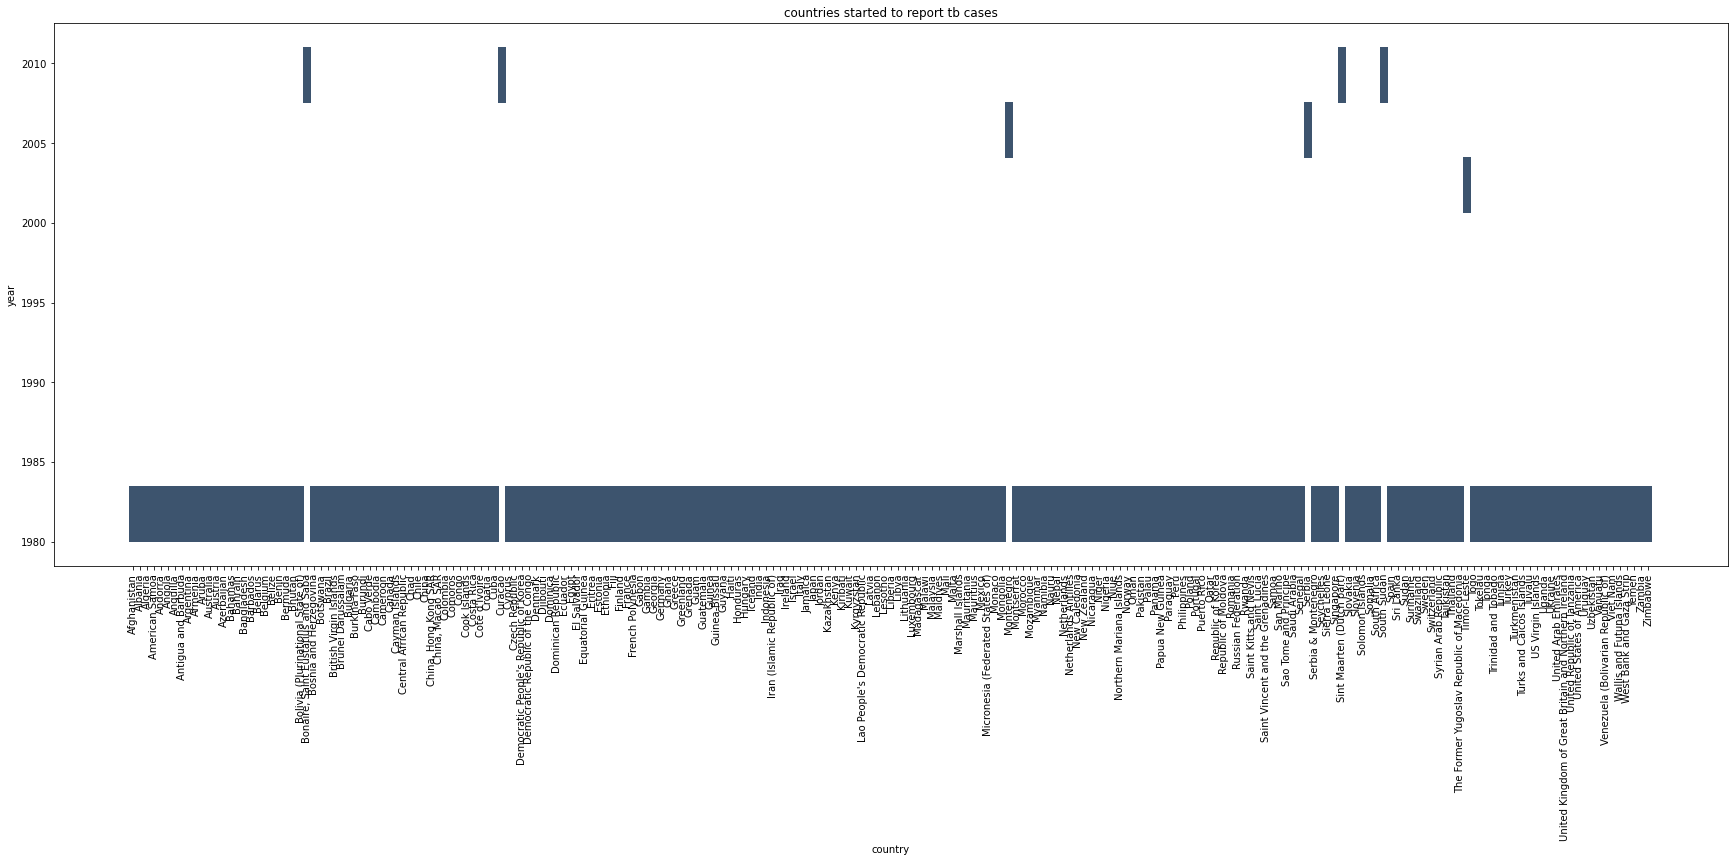

In [104]:
plt.rcParams['figure.figsize'] = (30,10)
fig = df.groupby('country').min()
fig.reset_index(inplace = True)
plt.xticks(rotation = 90)
sns.histplot(fig, x='country' , y='year').set_title("countries started to report tb cases")

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 [Text(-50.0, 0, 'Serbia'),
  Text(0.0, 0, 'Afghanistan'),
  Text(50.0, 0, "Cote d'Ivoire"),
  Text(100.0, 0, 'Kazakhstan'),
  Text(150.0, 0, 'Peru'),
  Text(200.0, 0, 'Turks and Caicos Islands'),
  Text(250.0, 0, '')])

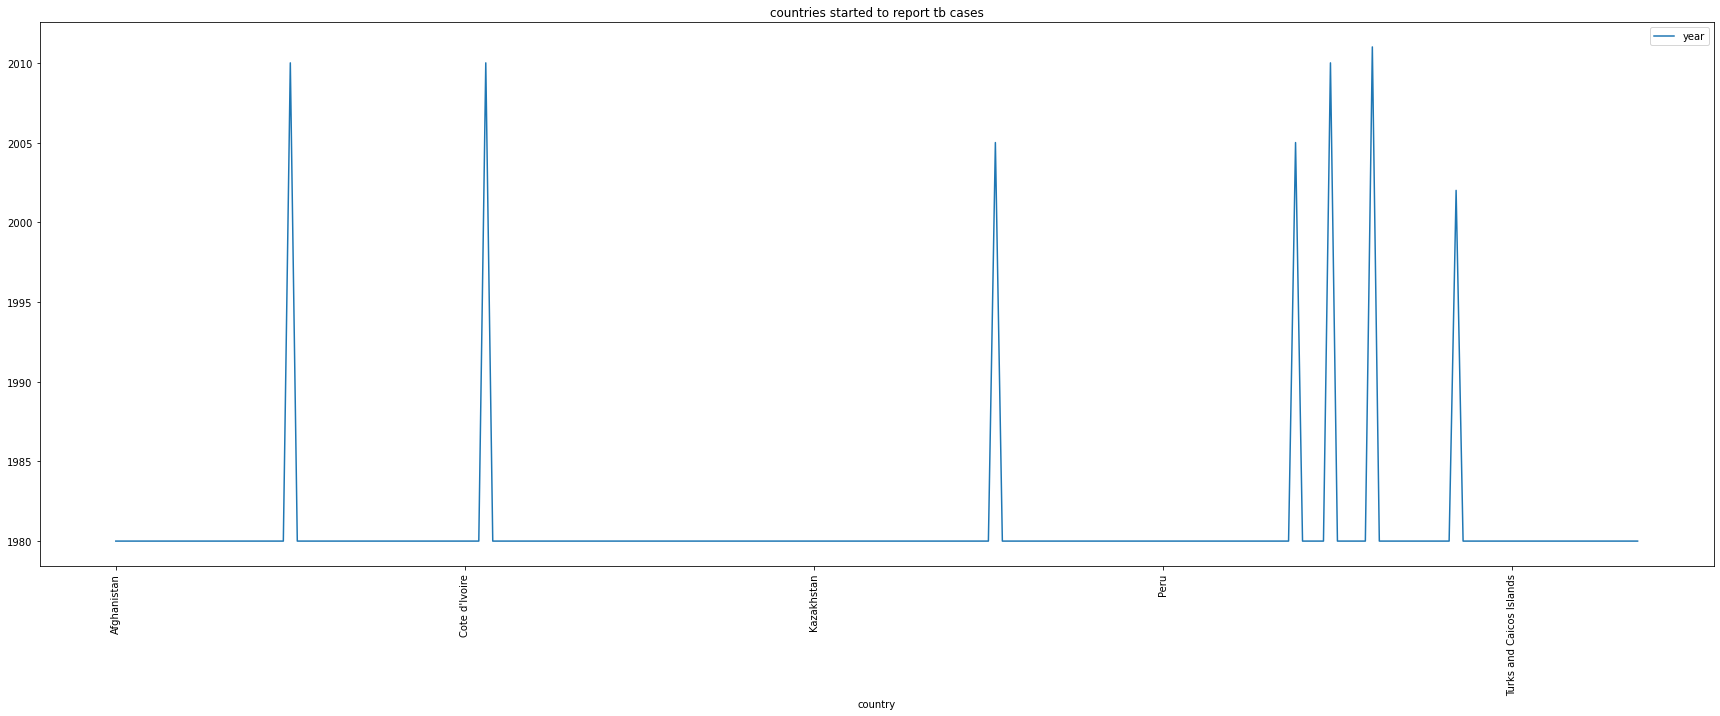

In [106]:

plt.rcParams['figure.figsize'] = (30,10)
fig = df.groupby('country').min()
fig.reset_index(inplace = True)
fig.plot(x='country', y='year', title = 'countries started to report tb cases')
plt.xticks(rotation = 90)